In [4]:
import pandas as pd
from io import StringIO

# 提供从 Excel 复制过来的数据，转换为字符串格式
data = """
Position(mm)	g2
9.7	1.41774
9.75	1.42019
9.8	1.42241
9.85	1.39796
9.9	1.40962
9.95	1.41076
10	1.40516
10.05	1.39506
10.1	1.37499
10.15	1.34661
10.2	1.32741
10.25	1.27449
10.3	1.2457
10.35	1.21509
10.4	1.17309
10.45	1.14645
10.5	1.11085
10.55	1.09473
10.6	1.08427
10.7	1.04874
10.8	1.01977
10.9	1.01587
"""

# 使用 StringIO 将字符串转换为类似文件的对象
data_io = StringIO(data)

# 将数据读入 Pandas DataFrame 中
df = pd.read_csv(data_io, sep="\t")  # 用 Tab 键作为分隔符

# 查看 DataFrame
print(df)


    Position(mm)       g2
0           9.70  1.41774
1           9.75  1.42019
2           9.80  1.42241
3           9.85  1.39796
4           9.90  1.40962
5           9.95  1.41076
6          10.00  1.40516
7          10.05  1.39506
8          10.10  1.37499
9          10.15  1.34661
10         10.20  1.32741
11         10.25  1.27449
12         10.30  1.24570
13         10.35  1.21509
14         10.40  1.17309
15         10.45  1.14645
16         10.50  1.11085
17         10.55  1.09473
18         10.60  1.08427
19         10.70  1.04874
20         10.80  1.01977
21         10.90  1.01587


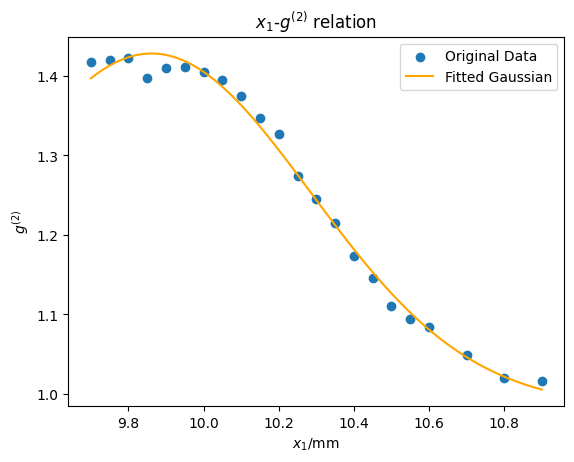

In [13]:
import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

# 定义高斯函数
def gaussian(x, a, b, x0, sigma):
    return (a * np.exp(-(x - x0)**2 / (2 * sigma**2)))+b

# 提取数据
x_data = df['Position(mm)']
y_data = df['g2']

# 拟合高斯函数
popt, pcov = curve_fit(gaussian, x_data, y_data,p0 = [0.4,1,9.8,1])

# 生成拟合曲线数据
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = gaussian(x_fit, *popt)

# 绘制原始数据和拟合曲线
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_fit, y_fit,color = 'orange', label='Fitted Gaussian')
plt.xlabel('$x_1$/mm')
plt.ylabel('$g^{(2)}$')
plt.title('$x_1$-$g^{(2)}$ relation')
plt.legend()
plt.show()

In [14]:
print(popt)

[0.44477209 0.98350793 9.86169977 0.42380823]


In [15]:
# 计算总平方和 (Total Sum of Squares)
ss_tot = np.sum((y_data - np.mean(y_data))**2)

# 计算残差平方和 (Residual Sum of Squares)
ss_res = np.sum((y_data - gaussian(x_data, *popt))**2)

# 计算决定系数 R^2
r_squared = 1 - (ss_res / ss_tot)

print(f"R^2: {r_squared}")

R^2: 0.9935427289210904
